## Final Project Submission

Please fill out:
* Student name: Diego Vallejos Salas
* Student pace: self paced
* Scheduled project review date/time: 06/15/2020
* Instructor name: Jeff Herman
* Blog post URL: https://diegovallejossalas.github.io/my_first_data_sciente_project_at_flatiron_school


In [1]:
# We need some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


It seems like we have some missing values, let's take a look deeper

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.duplicated().sum()

0

We need to create an index so we can identify each element. We're going to use 'id' because it seems to look like a good identifier and there are no duplicates.

In [5]:
df.set_index('id',inplace=True)
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Then we need to take a look for null values

In [6]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Yep, we have 3 columns with null values. We need to deep into these columns to decide what to do. Our intention here is to make our data more reliable for predictions so at first I'll try to avoid to drop rows. Let's see.

In [7]:
df['waterfront'].unique()

array([nan,  0.,  1.])

Let's consider this column as a categorical variable. It seems like 0 = no and 1 = yes, so we can consider the nan values as 0.

In [8]:
df['waterfront'].fillna(0,inplace=True)

In [9]:
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [10]:
#La data es categorica y los nan son equivalentes a 0. por lo tanto los reemplazamos.
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

As the waterfront column, it seems like this column is a categorical variable too so let's consider the nan values as 0.

In [11]:
df['view'].fillna(0,inplace=True)

In [12]:
df['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [13]:

df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

This is a categorical variable too, let's do the same.

In [14]:
df['yr_renovated'].fillna(0,inplace=True)

In [15]:
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

I'm curious about this variable, it looks like when you renovate your house it increases its price. Lets compare.

In [16]:
yr_vs_price_df=df.loc[:,['yr_renovated', 'price']]
yr_df= yr_vs_price_df.loc[yr_vs_price_df['yr_renovated'] > 0]
no_yr_df= yr_vs_price_df.loc[yr_vs_price_df['yr_renovated'] <= 0]
print(no_yr_df.head())
yr_df.head()

            yr_renovated      price
id                                 
7129300520           0.0   221900.0
5631500400           0.0   180000.0
2487200875           0.0   604000.0
1954400510           0.0   510000.0
7237550310           0.0  1230000.0


,yr_renovated,price
id,,
6414100192,1991.0,538000.0
9547205180,2002.0,696000.0
1483300570,1991.0,905000.0
2450000295,2010.0,1090000.0
4389200955,1992.0,1450000.0


AxesSubplot(0.125,0.125;0.775x0.755)
768901.8924731183
744
532140.319858054
20853


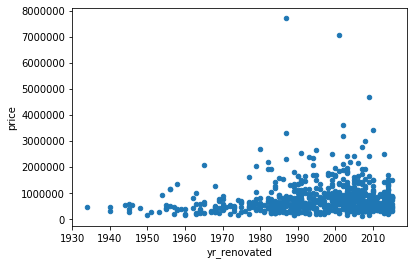

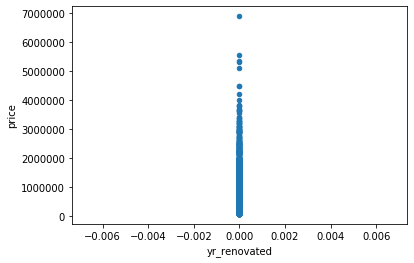

In [17]:
print(yr_df.plot.scatter('yr_renovated','price'))
no_yr_df.plot.scatter('yr_renovated','price')
print(yr_df['price'].mean())
print(len(yr_df['price']))
print(no_yr_df['price'].mean())
print(len(no_yr_df['price']))

It's not clear but we'll explore this later.

Another column we have to transform is 'date'. Lets transform it in some more apropiate dtype.

I decided to turn it into a datetime type but taking the month as an indicator because years are too long and days are just a few. We could probably find something related to months.

In [18]:
df['date'] = pd.to_datetime(df.date)
df['date']= df['date'].dt.month
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,12,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Let's verify our data.

In [19]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

As I understand this dataset, I will drop 'lat' and 'long' variables because we have the zipcode, wich contains both in some way.

In [20]:
df=df.drop('lat',axis=1)

In [21]:
df=df.drop('long',axis=1)

Now we need to explore the other variables. let's go!

In [22]:
print(df['bedrooms'].unique())
df['bedrooms'].value_counts()

[ 3  2  4  5  1  6  7  8  9 11 10 33]


3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

We have to replace the outlier, 33 rooms is almost impossible.

In [23]:
df.loc[df['bedrooms'] == 33, 'bedrooms'] = df['bedrooms'].median()

In [24]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

This looks weird but there are 1/4 bathrooms.

In [25]:
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

I'm just curious about the relationship between 'sqft_living' and 'price. Let's take a look.

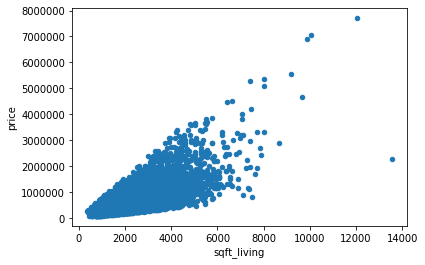

In [26]:
df.plot.scatter('sqft_living','price')

To understand the next step we have to remind what each column means:

id - unique identified for a house

dateDate - house was sold

pricePrice - is prediction target

bedroomsNumber - of Bedrooms/House

bathroomsNumber - of bathrooms/bedrooms

sqft_livingsquare - footage of the home

sqft_lotsquare - footage of the lot

floorsTotal - floors (levels) in house

waterfront - House which has a view to a waterfront

view - Has been viewed

condition - How good the condition is ( Overall )

grade - overall grade given to the housing unit, based on King County grading system

sqft_above - square footage of house apart from basement

sqft_basement - square footage of the basement

yr_built - Built Year

yr_renovated - Year when house was renovated

zipcode - zip

lat - Latitude coordinate

long - Longitude coordinate

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

_______________________________________________________________________________________________________________________________
there are too many sqft information:

sqft_livingsquare - footage of the home

sqft_lotsquare - footage of the lot

sqft_above - square footage of house apart from basement

sqft_basement - square footage of the basement

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

The point here is that, as we can remember, sqft_basement is an object type and it had a lot of zeros but thinking more about the description of every column we can see that the sqft_above column refers to the sqft of the house without the basement so, if we want to make sure that all those missing values that we replaced with 0's is right we need to do some math, resting the sqft_above on sqft_living and replacing sqft_basement with the result of this. Doing things that way, we're going to have an int type.

In [27]:
df['sqft_basement']=df['sqft_living']-df['sqft_above']

In [28]:
df['sqft_basement'].dtype

dtype('int64')

great! Let's go on!

In [29]:
print(df['floors'].unique())
df['floors'].value_counts()

[1.  2.  1.5 3.  2.5 3.5]


1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Let's see quickly if number of floors has any relationship with price.

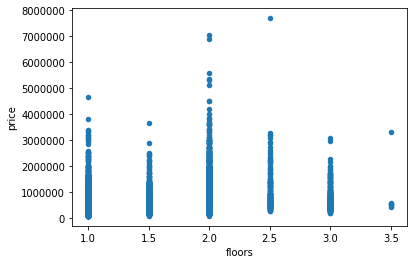

In [30]:
df.plot.scatter('floors','price')

In [31]:
print(df['condition'].unique())
df['condition'].value_counts()

[3 5 4 1 2]


3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [32]:
df.groupby(df['condition']).mean()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
condition,,,,,,,,,,,,,,,,,
1,6.241379,341067.241379,2.551724,1.215517,1247.931034,22174.379310,1.155172,0.034483,0.310345,5.965517,1173.793103,74.137931,1930.448276,68.689655,98094.862069,1808.965517,9495.068966
2,6.182353,328178.758824,2.858824,1.460294,1420.823529,32706.458824,1.158824,0.005882,0.076471,6.541176,1252.411765,168.411765,1948.911765,34.847059,98092.170588,1585.511765,19610.211765
3,6.548787,542173.057347,3.376748,2.223680,2149.205492,14746.596362,1.620150,0.005706,0.212411,7.827318,1906.793153,242.412340,1979.452211,85.976320,98078.648288,2043.880385,12498.973823
4,6.567729,521374.450414,3.357936,1.901092,1951.408843,16020.618813,1.261230,0.008103,0.261934,7.382596,1591.044037,360.364805,1958.350009,37.039810,98072.506606,1901.293641,13701.205038
5,6.847149,612577.742504,3.442681,2.024397,2022.911229,13052.582011,1.271605,0.010582,0.322751,7.320988,1537.788948,485.122281,1946.448560,36.091711,98088.675485,1842.560259,11119.460317


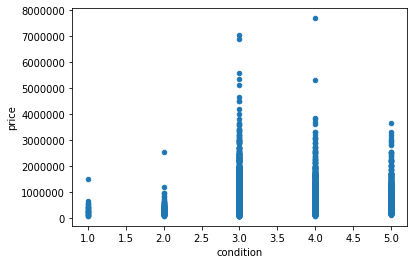

In [33]:
df.plot.scatter('condition','price')

In [34]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

Let's take a look on the outliers.

In [35]:
df.quantile(q=.99)

date                  12.00
price            1970000.00
bedrooms               6.00
bathrooms              4.25
sqft_living         4980.00
sqft_lot          213008.00
floors                 3.00
waterfront             0.00
view                   4.00
condition              5.00
grade                 11.00
sqft_above          4370.00
sqft_basement       1660.00
yr_built            2014.00
yr_renovated        2006.04
zipcode            98199.00
sqft_living15       4080.00
sqft_lot15        157687.00
Name: 0.99, dtype: float64

Ok, let's clean this. The first big step is reduce the price range. Let's say 1 500 000 is a good amount of money for a house, not everybody can afford more than this so I think this is a reasonable amount.

Just to make shure we're not ruining our data, let's create a new one to work with.

In [36]:
df_price_range = df.loc[df['price'] <1500000]

In [37]:
#A continuacion determinamos el porcentaje de la muestra que vamos a retirar, solo para tener una idea.
(len(df)-len(df_price_range))/len(df)

0.024771959068389127

We're taking away just 2% of the dataset. It's ok.

In [38]:
df_price_range.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,10,221900.0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,1340,5650
6414100192,12,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,1690,7639
5631500400,2,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,2720,8062
2487200875,12,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,1360,5000
1954400510,2,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,1800,7503


At this point we need to plot some charts to the the relationship between independent variables and dependent variable ('price').

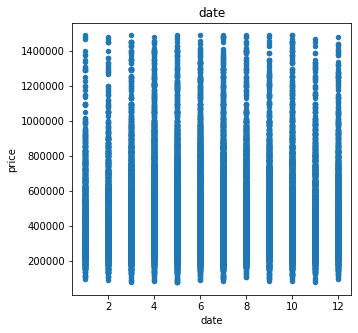

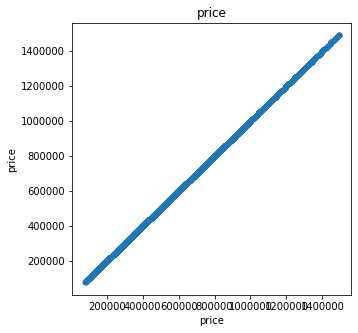

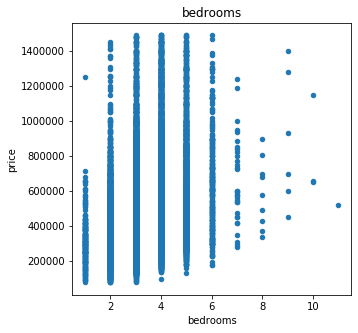

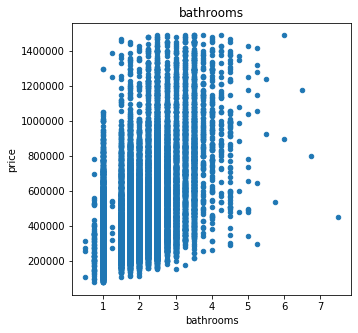

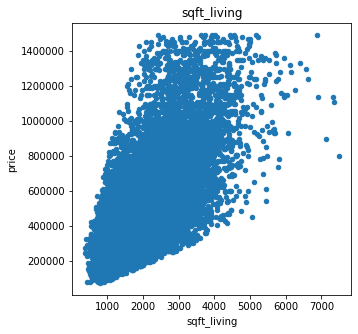

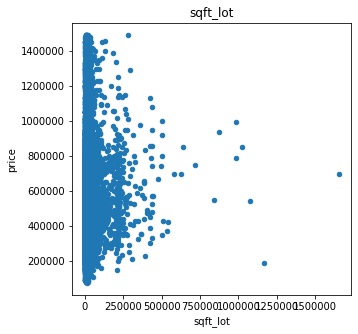

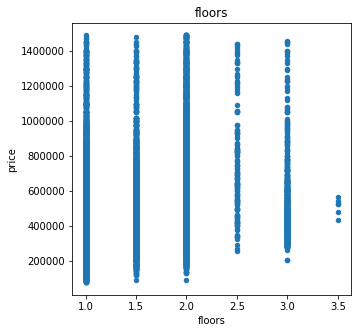

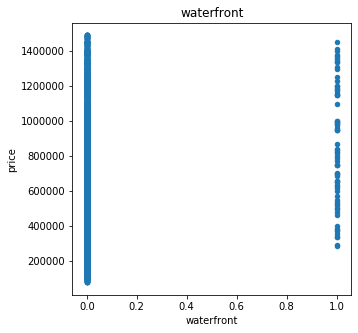

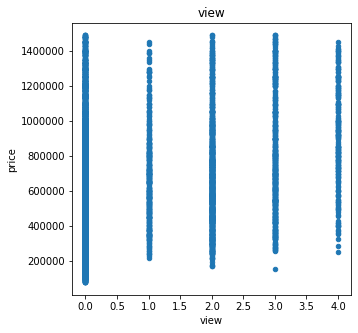

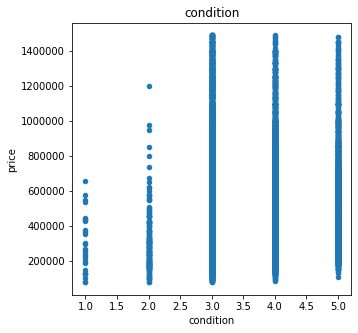

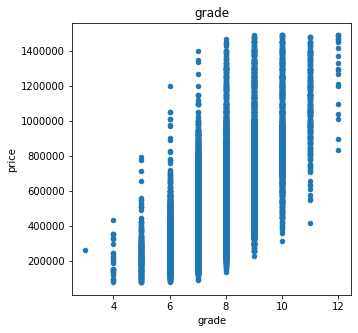

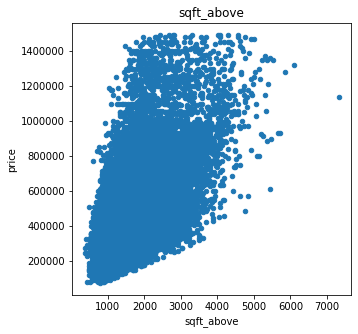

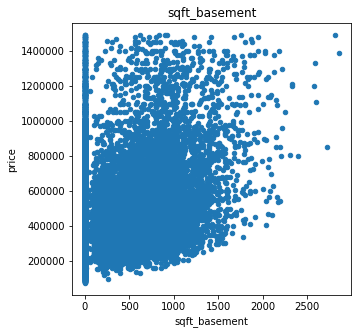

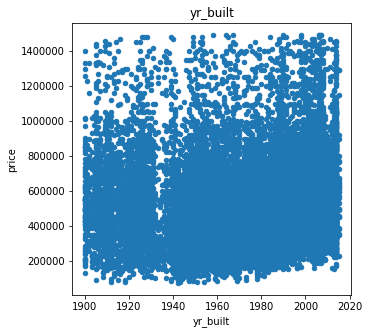

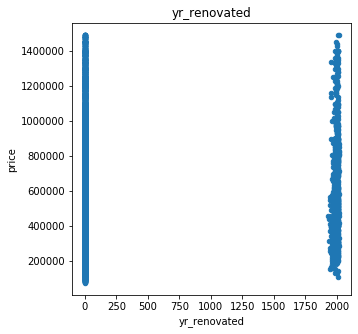

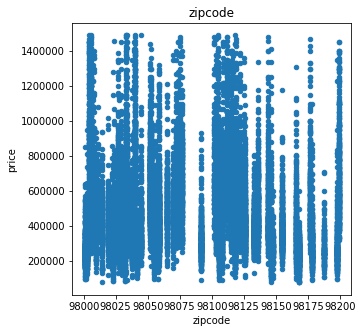

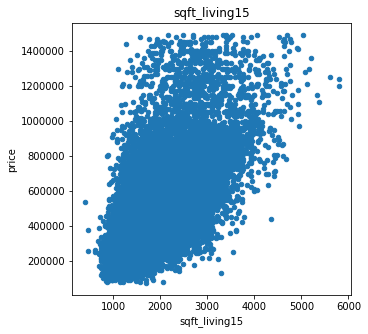

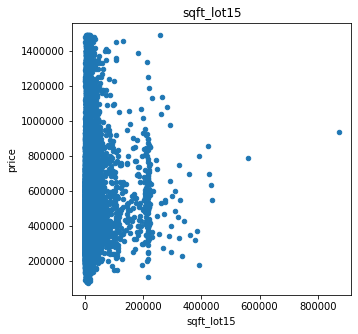

In [39]:
for element in df_price_range.columns:
    df_price_range.plot.scatter(element,'price',figsize=(5,5))
    plt.title(element)

Here we decided to put some parameters for the data set, after seeing the graphs we can specify that there is data that will distort the model as it is very far from the media. 

Due to this, we dont have to do a log transformation

In [40]:
df_price_range = df_price_range.loc[df_price_range['bedrooms'] < 9]
df_price_range = df_price_range.loc[df_price_range['bathrooms'] < 8]
df_price_range = df_price_range.loc[df_price_range['sqft_living'] < 7000]

In [41]:
df_price_range.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,10,221900.0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,1340,5650
6414100192,12,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,1690,7639
5631500400,2,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,2720,8062
2487200875,12,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,1360,5000
1954400510,2,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,1800,7503


Now let's see the correlation between independent variables. If we find that on some variables, we cant' use both in the same model.

Text(0.5, 1, 'Correlation between variables')

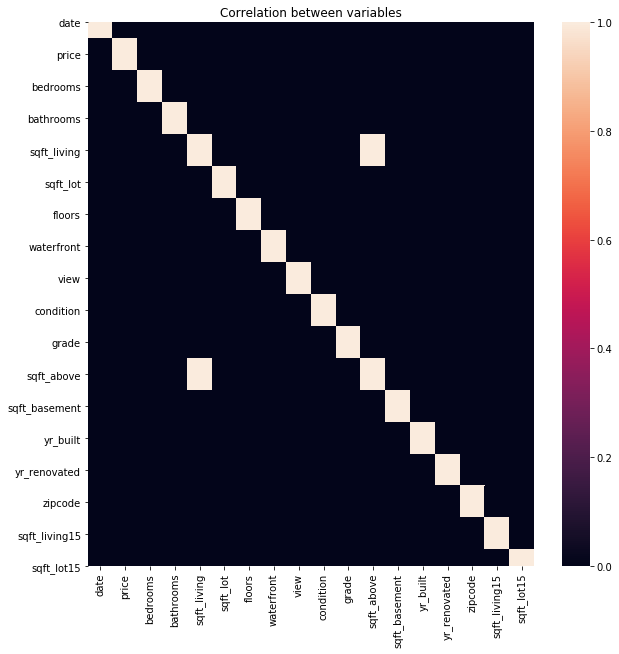

In [42]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_price_range.corr() > 0.75)
plt.title("Correlation between variables")

As we can see, there is a correlation between  sqft living and sqft above. We have to consider this in order to keep them separated.
So far we can say we can see some relation between some categories and price:


bedrooms 

bathrooms

sqft_living

waterfront

grade

yr_renovated


Let's explore more about these variables.

Lets see how much this variables can fit with our model

In [43]:
f = 'price~bedrooms'

model = ols(formula=f, data=df_price_range).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     2339.
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:03:42   Log-Likelihood:            -2.9006e+05
No. Observations:               21048   AIC:                         5.801e+05
Df Residuals:                   21046   BIC:                         5.801e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.049e+05   6317.147     32.429      0.000    1.92e+05    2.17e+05
bedrooms    8.826e+04   1824.944     48.365      0.000    8.47e+04    9.18e+04
==============================================================================
Omnibus:                     3751.603   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6817.438
Skew:                           1.129   Prob(JB):                         0.00
Kurtosis:                       4.635   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
f = 'price~bathrooms'

model = ols(formula=f, data=df_price_range).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     6518.
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:03:42   Log-Likelihood:            -2.8833e+05
No. Observations:               21048   AIC:                         5.767e+05
Df Residuals:                   21046   BIC:                         5.767e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.577e+05   4495.314     35.081      0.000    1.49e+05    1.67e+05
bathrooms   1.648e+05   2041.129     80.735      0.000    1.61e+05    1.69e+05
==============================================================================
Omnibus:                     3308.683   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5736.710
Skew:                           1.030   Prob(JB):                         0.00
Kurtosis:                       4.516   Cond. No.                         7.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
f = 'price~sqft_living'

model = ols(formula=f, data=df_price_range).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 1.587e+04
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:03:42   Log-Likelihood:            -2.8526e+05
No. Observations:               21048   AIC:                         5.705e+05
Df Residuals:                   21046   BIC:                         5.705e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.018e+05   3413.412     29.820      0.000    9.51e+04    1.08e+05
sqft_living   197.3495      1.567    125.972      0.000     194.279     200.420
==============================================================================
Omnibus:                     2843.276   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5123.521
Skew:                           0.884   Prob(JB):                         0.00
Kurtosis:                       4.647   Cond. No.                     5.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
f = 'price~grade'

model = ols(formula=f, data=df_price_range).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:03:43   Log-Likelihood:            -2.8503e+05
No. Observations:               21048   AIC:                         5.701e+05
Df Residuals:                   21046   BIC:                         5.701e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.382e+05   8909.802    -71.624      0.000   -6.56e+05   -6.21e+05
grade         1.5e+05   1161.903    129.089      0.000    1.48e+05    1.52e+05
==============================================================================
Omnibus:                     3159.393   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5766.614
Skew:                           0.963   Prob(JB):                         0.00
Kurtosis:                       4.692   Cond. No.                         54.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
f = 'price~waterfront'

model = ols(formula=f, data=df_price_range).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           7.91e-36
Time:                        22:03:43   Log-Likelihood:            -2.9109e+05
No. Observations:               21048   AIC:                         5.822e+05
Df Residuals:                   21046   BIC:                         5.822e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.99e+05   1695.105    294.394      0.000    4.96e+05    5.02e+05
waterfront  3.603e+05   2.88e+04     12.519      0.000    3.04e+05    4.17e+05
==============================================================================
Omnibus:                     4050.476   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7435.007
Skew:                           1.211   Prob(JB):                         0.00
Kurtosis:                       4.617   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
f = 'price~yr_renovated'

model = ols(formula=f, data=df_price_range).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           2.11e-43
Time:                        22:03:43   Log-Likelihood:            -2.9108e+05
No. Observations:               21048   AIC:                         5.822e+05
Df Residuals:                   21046   BIC:                         5.822e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.96e+05   1718.633    288.608      0.000    4.93e+05    4.99e+05
yr_renovated    66.4776      4.802     13.845      0.000      57.066      75.889
==============================================================================
Omnibus:                     4034.695   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7404.548
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                       4.620   Cond. No.                         364.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
f = 'price~grade+bedrooms+bathrooms+waterfront'

model = ols(formula=f, data=df_price_range).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     4491.
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:03:43   Log-Likelihood:            -2.8467e+05
No. Observations:               21048   AIC:                         5.694e+05
Df Residuals:                   21043   BIC:                         5.694e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.388e+05   9628.720    -66.344      0.000   -6.58e+05    -6.2e+05
grade        1.34e+05   1479.179     90.559      0.000    1.31e+05    1.37e+05
bedrooms    2.149e+04   1649.298     13.028      0.000    1.83e+04    2.47e+04
bathrooms   2.365e+04   2428.146      9.738      0.000    1.89e+04    2.84e+04
waterfront  3.714e+05   2.12e+04     17.487      0.000     3.3e+05    4.13e+05
==============================================================================
Omnibus:                     2923.340   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5125.332
Skew:                           0.918   Prob(JB):                         0.00
Kurtosis:                       4.573   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
f = 'price~grade+sqft_living+yr_built+waterfront'

model = ols(formula=f, data=df_price_range).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     7672.
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:03:43   Log-Likelihood:            -2.8170e+05
No. Observations:               21048   AIC:                         5.634e+05
Df Residuals:                   21043   BIC:                         5.635e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.751e+06   7.94e+04     59.844      0.000     4.6e+06    4.91e+06
grade        1.251e+05   1549.493     80.751      0.000    1.22e+05    1.28e+05
sqft_living   109.3300      1.939     56.372      0.000     105.529     113.131
yr_built    -2751.3512     42.107    -65.341      0.000   -2833.885   -2668.818
waterfront   2.974e+05   1.84e+04     16.125      0.000    2.61e+05    3.34e+05
==============================================================================
Omnibus:                     2274.062   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4727.625
Skew:                           0.687   Prob(JB):                         0.00
Kurtosis:                       4.871   Cond. No.                     2.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ok, it looks like we find our model. let's orther a little bit this data.

In [51]:
df_price_range.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

Let's divide out dataset by dependent and independent variables

In [52]:
dependent = df_price_range['price']
independents = df_price_range.drop([ 'date', 'view','price', 'bedrooms', 'bathrooms','sqft_lot','sqft_above','sqft_basement', 
                                    'sqft_living15','sqft_lot15', 'zipcode', 'yr_renovated', 'condition',
                                    'floors'], axis=1)

In [53]:
print(dependent.head())
independents.head()

id
7129300520    221900.0
6414100192    538000.0
5631500400    180000.0
2487200875    604000.0
1954400510    510000.0
Name: price, dtype: float64


,sqft_living,waterfront,grade,yr_built
id,,,,
7129300520,1180,0.0,7,1955
6414100192,2570,0.0,7,1951
5631500400,770,0.0,6,1933
2487200875,1960,0.0,7,1965
1954400510,1680,0.0,8,1987


In [54]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(independents, dependent)

In [55]:
selector.support_ 

array([ True,  True,  True,  True])

Ok, let's say those are good predictors

In [56]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 1.09329963e+02  2.97419114e+05  1.25123329e+05 -2.75135121e+03]
4751444.954870967


its time to train and test our model

Lets rename our dependent and independents variables as Y and X
then let's divide groups to test the model.

In [57]:
y = dependent
X = independents

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

print(len(X_train), len(X_test), len(y_train), len(y_test))

17890 3158 17890 3158


In [58]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [59]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [60]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 24536770031.947453
Test Mean Squarred Error: 25612716713.23536


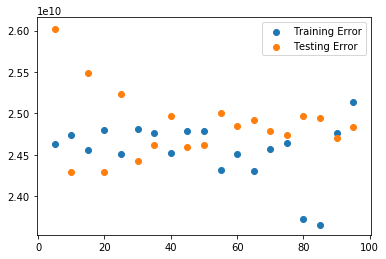

In [61]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

This is ok, it looks like our model is not underfitted or overfitted.

Ok, so our model is nor overfitted or underfitted, looks good. Let's make it work!

In [62]:
model = linreg.fit(X, y)

var_coefs = list(zip(X.columns, model.coef_))
var_coefs

[('sqft_living', 109.3299633686709),
 ('waterfront', 297419.1139444361),
 ('grade', 125123.32943470686),
 ('yr_built', -2751.351208831604)]

WHEN TO BUY? WHEN TO SELL?

In [63]:
df_price_range['price_counts'] = df_price_range['price']/ df_price_range['price'] 

In [64]:
df_price_range.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price_counts'],
      dtype='object')

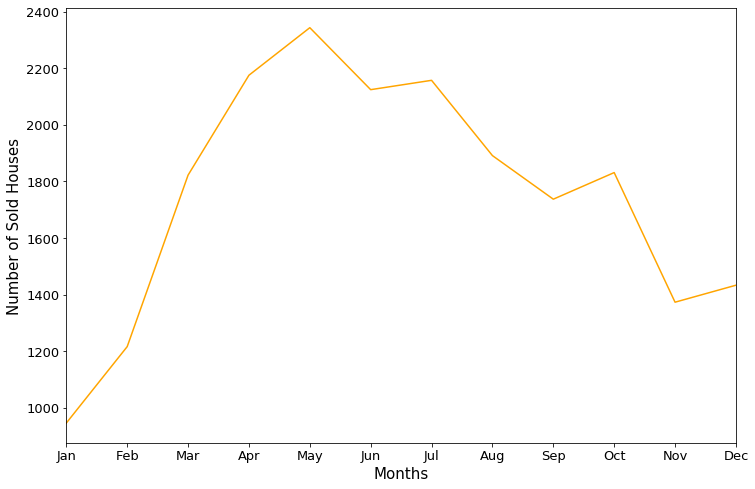

In [65]:
date_and_price_counts = df_price_range.groupby('date')['price_counts'].sum().plot(kind = 'line', color= 'orange', figsize = (12,8))
date_and_price_counts.set_xlabel("Months", fontsize = 15)
date_and_price_counts.set_ylabel("Number of Sold Houses", fontsize = 15)
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize = 13)
plt.yticks(fontsize = 13);

We can clearly see that the largest number of people buy houses between March and June. Therefore, the best time to sell a house is between those months. On the contrary, very few people buy houses between November and January, so that having lower demand, prices should be lower. We can buy a lower price by looking at our model factors to invest in an upgrade and sell at a higher price.